In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings("ignore")

In [5]:
import datetime as dt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import os
os.chdir('/Users/mori/devel/botfed-py')

In [11]:
from botfed.prod_metrics import hl_pos_hist as ph
from botfed.aero import pos_history as aph
from botfed.aero.vars import get_w3
import os
import dotenv
dotenv.load_dotenv()

True

In [211]:
# edate = dt.datetime.now(tz=dt.timezone.utc)
sdate = dt.datetime(2025, 7, 25, 15, 0, tzinfo=dt.timezone.utc)
edate = dt.datetime(2025, 7, 31, 15, 0, tzinfo=dt.timezone.utc)
# sdate = dt.datetime(2025, 8, 25, 0, 0, tzinfo=dt.timezone.utc)
sample_freq_mins = int(1*60)
lookback_hours = (edate - sdate).total_seconds() / (60*60)
print(f"Lookback hours {lookback_hours:.2f}")
acct_start, acct_end, trades_df, income_df = ph.fetch_all_data(sdate, edate)
print(f"Total equity: ${acct_end.total_equity:.2f}, Acct_end time {acct_end.snap_time}, edate {edate}")

Lookback hours 144.00
Total equity: $5676.74, Acct_end time 2025-07-31T23:59:01.480936+00:00, edate 2025-07-31 15:00:00+00:00


In [212]:
from botfed.web3_utils.find_block import find_block_by_timestamp

block_end = find_block_by_timestamp(w3, edate.timestamp(), bias='right')
block_start = find_block_by_timestamp(w3, sdate.timestamp(), bias='left')
print(edate, block_end, dt.datetime.utcfromtimestamp(w3.eth.get_block(block_end).timestamp))
print(sdate, block_start, dt.datetime.utcfromtimestamp(w3.eth.get_block(block_start).timestamp))

2025-07-31 15:00:00+00:00 33592327 2025-07-31 15:00:01
2025-07-25 15:00:00+00:00 33333126 2025-07-25 14:59:59


In [213]:
snaps_df, combined, acct_start, acct_end, symbols, price_df, trades_df, income_df = ph.get_hist_snaps(sdate, edate)
income_df = income_df[income_df['timestamp'] >= sdate]
combined = combined[combined['timestamp'] >= sdate]
snaps_df

,AERO,AIXBT,BRETT,BTC,ETH,KAITO,VIRTUAL,ZORA,total_equity,cash,unrealizedPnl,positions,transfer,pnl
timestamp,,,,,,,,,,,,,,
2025-07-25 11:00:00+00:00,0.8938,0.14552,0.05552,116306.9,3717.69,1.3360,1.5544,0.04280,2644.013877,2765.938132,-121.924255,"{'ETH': Position(symbol='ETH', position_size=-...",0,0.000000
2025-07-25 11:01:00+00:00,0.8953,0.14573,0.05560,116337.6,3720.48,1.3378,1.5554,0.04297,2634.794924,2765.938132,-131.143208,"{'ETH': Position(symbol='ETH', position_size=-...",0,-9.218953
2025-07-25 11:02:00+00:00,0.8963,0.14600,0.05573,116410.6,3723.62,1.3387,1.5580,0.04266,2632.417046,2765.938132,-133.521086,"{'ETH': Position(symbol='ETH', position_size=-...",0,-2.377878
2025-07-25 11:03:00+00:00,0.8964,0.14555,0.05566,116387.6,3722.86,1.3372,1.5572,0.04229,2628.059718,2765.938132,-137.878414,"{'ETH': Position(symbol='ETH', position_size=-...",0,-4.357328
2025-07-25 11:04:00+00:00,0.8965,0.14583,0.05572,116440.8,3725.83,1.3388,1.5602,0.04197,2615.822519,2765.938132,-150.115613,"{'ETH': Position(symbol='ETH', position_size=-...",0,-12.237199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-31 23:55:00+00:00,0.7896,0.12373,0.05248,115665.0,3697.00,1.1673,1.2542,0.06210,4642.100041,2903.944065,1738.155976,"{'ETH': Position(symbol='ETH', position_size=-...",0,-25.908668
2025-07-31 23:56:00+00:00,0.7901,0.12373,0.05243,115675.8,3698.48,1.1674,1.2534,0.06211,4649.532991,2903.944065,1745.588926,"{'ETH': Position(symbol='ETH', position_size=-...",0,7.432950
2025-07-31 23:57:00+00:00,0.7901,0.12361,0.05242,115712.3,3697.30,1.1662,1.2534,0.06215,4650.934259,2903.944065,1746.990194,"{'ETH': Position(symbol='ETH', position_size=-...",0,1.401268


In [214]:
from botfed.aero.get_transfers import get_funding_transfers
funding_addr = os.environ["AERO_MANAGER_GOV"]
withdraw_addr = os.environ["AERO_WITHDRAW"]
manager_addr = os.environ["AERO_MANAGER_ADDRESS"]
lp_transfers = get_funding_transfers(funding_addr, manager_addr, withdraw_addr)
lp_transfers = lp_transfers.set_index("timestamp")
lp_transfers = lp_transfers[['value']] # .resample("1T").sum().resample("%sT" % sample_freq_mins).last()
lp_transfers = lp_transfers[lp_transfers.index >= sdate]
lp_transfers

,value
timestamp,
2025-07-25 15:33:11+00:00,4999.70000
2025-07-27 21:30:51+00:00,1000.00000
2025-07-27 22:09:51+00:00,1000.00000
2025-07-27 22:12:09+00:00,0.00001
2025-07-28 23:33:27+00:00,3000.00000
2025-08-01 03:54:31+00:00,7000.00000
2025-08-04 14:27:25+00:00,0.00001
2025-08-13 12:57:57+00:00,0.00010
2025-08-13 12:59:29+00:00,0.00001


In [237]:
from botfed.aero.get_nfts import get_pos_ids

eoa = os.environ['AERO_MANAGER_ADDRESS']
gov = os.environ['AERO_MANAGER_GOV']


position_ids = get_pos_ids(eoa, startblock=block_start, endblock=block_end)
position_ids = [p for p in position_ids.keys()]
print(position_ids)
sample_freq = (sample_freq_mins * 60 ) // 2

df, pools_df = aph.sample_positions(w3, eoa, position_ids, sample_freq, block_start, block_end, wallet=True, whitelist=True)
df

[20829902, 20262094, 20829430, 20921336, 20950406, 20843061, 20830112, 20575653, 20628363, 20965150, 20957378, 20528226, 20742934, 20744214, 21043435, 20833742, 20573333, 20974119, 20976223, 20977446, 20531398, 20541064, 20480065, 20466788, 20838383, 20835017, 20262231, 20390931, 20478300, 20620974, 20466938]


2025-08-29 15:44:31,515 - botfed.aero.pos_history - WARNING - Using whitelist, might miss some tokens


,VIRTUAL,WETH,BRETT,AIXBT,KAITO,ZORA,USDC,cbBTC,AERO,block,timestamp
0,2774.343078,0.688709,34683.165363,NaN,886.908032,NaN,NaN,NaN,2.491765,33333127.0,2025-07-25 15:00:01+00:00
1,2668.540862,0.730037,34842.611554,NaN,886.549125,NaN,NaN,NaN,6.819718,33334927.0,2025-07-25 16:00:01+00:00
2,2615.258441,1.615242,34917.414129,6361.630453,878.775862,NaN,NaN,0.008489,0.040571,33336727.0,2025-07-25 17:00:01+00:00
3,2647.223517,1.595895,35437.292814,6454.907779,875.506833,NaN,NaN,0.008363,0.390779,33338527.0,2025-07-25 18:00:01+00:00
4,2647.223517,1.593836,35347.846524,6463.142503,875.671623,NaN,NaN,0.008457,3.810808,33340327.0,2025-07-25 19:00:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...
140,6506.920938,0.715199,36349.434310,7976.424434,918.168767,19240.238829,295.697572,0.018849,8.436095,33585127.0,2025-07-31 11:00:01+00:00
141,6502.712120,0.718701,36349.434310,7976.457186,925.600418,19058.688676,307.731450,0.018707,12.255112,33586927.0,2025-07-31 12:00:01+00:00
142,6911.510362,0.548344,36349.434310,8142.624902,986.866750,19114.894671,304.056569,0.018707,0.217350,33588727.0,2025-07-31 13:00:01+00:00
143,7078.316572,0.495160,36349.434310,8307.455486,987.483226,19958.901730,248.916749,0.018337,0.002422,33590527.0,2025-07-31 14:00:01+00:00


In [230]:
gov_bal = aph.sample_balances(w3, gov, sample_freq, block_start, block_end)
gov_bal

2025-08-29 15:39:37,065 - botfed.aero.pos_history - WARNING - Using whitelist might miss some tokens ...


,USDC,WETH,AERO,AIXBT,ZORA,cbBTC,BRETT,VIRTUAL,KAITO,block,timestamp
0,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33333127,2025-07-25 15:00:01+00:00
1,999.7,8.263106e-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33334927,2025-07-25 16:00:01+00:00
2,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33336727,2025-07-25 17:00:01+00:00
3,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33338527,2025-07-25 18:00:01+00:00
4,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33340327,2025-07-25 19:00:01+00:00
...,...,...,...,...,...,...,...,...,...,...,...
140,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33585127,2025-07-31 11:00:01+00:00
141,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33586927,2025-07-31 12:00:01+00:00
142,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33588727,2025-07-31 13:00:01+00:00
143,0.0,1.000000e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33590527,2025-07-31 14:00:01+00:00


In [231]:
price_df['USDC'] = 1
price_df['USDCUSDT'] = 1
price_df = price_df.fillna(0)
gov_ntls = aph.get_notionals(gov_bal.copy(), price_df.copy()).fillna(0)
print(gov_ntls)

                           AERO  AIXBT  BRETT  BTC          ETH  KAITO   USDC  \
timestamp                                                                       
2025-07-25 15:00:00+00:00   0.0    0.0    0.0  0.0     0.000036    0.0    0.0   
2025-07-25 16:00:00+00:00   0.0    0.0    0.0  0.0  3003.795998    0.0  999.7   
2025-07-25 17:00:00+00:00   0.0    0.0    0.0  0.0     0.000036    0.0    0.0   
2025-07-25 18:00:00+00:00   0.0    0.0    0.0  0.0     0.000036    0.0    0.0   
2025-07-25 19:00:00+00:00   0.0    0.0    0.0  0.0     0.000036    0.0    0.0   
...                         ...    ...    ...  ...          ...    ...    ...   
2025-07-31 11:00:00+00:00   0.0    0.0    0.0  0.0     0.000039    0.0    0.0   
2025-07-31 12:00:00+00:00   0.0    0.0    0.0  0.0     0.000038    0.0    0.0   
2025-07-31 13:00:00+00:00   0.0    0.0    0.0  0.0     0.000038    0.0    0.0   
2025-07-31 14:00:00+00:00   0.0    0.0    0.0  0.0     0.000038    0.0    0.0   
2025-07-31 15:00:00+00:00   

In [232]:
price_df['USDCUSDT'] = 1
lp_ntls = aph.get_notionals(df.copy(), price_df.copy()).fillna(0)
ntls = lp_ntls + gov_ntls
#ntls.index = ntls.index.floor("%sT" % sample_freq_mins)
lp_snaps = pd.DataFrame()
lp_snaps['equity'] = ntls.sum(axis=1)

pnl = ntls.sum(axis=1).diff().fillna(0)
adjustment = pd.Series(0.0, index=pnl.index)
print(lp_transfers)
for ts, row in lp_transfers.iterrows():
    # Find the first ntls timestamp after this lp_transfer
    future_ts = pnl.index[pnl.index > ts]
    if not future_ts.empty and future_ts[0] > pnl.index[0]:
        apply_ts = future_ts[0]
        adjustment.loc[apply_ts] -= row["value"]

lp_snaps["pnl"] = pnl + adjustment

print(f"Mean total ntl ${ntls.sum(axis=1).mean():.2f}")
print(ntls.head())
print(gov_ntls)


                                value
timestamp                            
2025-07-25 15:33:11+00:00  4999.70000
2025-07-27 21:30:51+00:00  1000.00000
2025-07-27 22:09:51+00:00  1000.00000
2025-07-27 22:12:09+00:00     0.00001
2025-07-28 23:33:27+00:00  3000.00000
2025-08-01 03:54:31+00:00  7000.00000
2025-08-04 14:27:25+00:00     0.00001
2025-08-13 12:57:57+00:00     0.00010
2025-08-13 12:59:29+00:00     0.00001
Mean total ntl $17569.54
                               AERO       AIXBT        BRETT         BTC  \
timestamp                                                                  
2025-07-25 15:00:00+00:00  2.139678    0.000000  1850.346872    0.000000   
2025-07-25 16:00:00+00:00  5.894964    0.000000  1855.717491    0.000000   
2025-07-25 17:00:00+00:00  0.035289  901.570268  1881.699447  986.052887   
2025-07-25 18:00:00+00:00  0.337359  909.948350  1896.603911  970.663338   
2025-07-25 19:00:00+00:00  3.295587  913.177404  1902.067621  984.308555   

                        

timestamp
2025-07-25 15:00:00+00:00       0.000000
2025-07-25 16:00:00+00:00    -966.627899
2025-07-25 17:00:00+00:00    1079.936409
2025-07-25 18:00:00+00:00     -50.513095
2025-07-25 19:00:00+00:00      54.239135
                                ...     
2025-07-31 11:00:00+00:00     -86.900506
2025-07-31 12:00:00+00:00     -86.259351
2025-07-31 13:00:00+00:00    -185.426794
2025-07-31 14:00:00+00:00    -197.301030
2025-07-31 15:00:00+00:00    -277.523470
Name: pnl, Length: 145, dtype: float64
timestamp
2025-07-25 15:00:00+00:00           NaN
2025-07-25 16:00:00+00:00    -26.559582
2025-07-25 17:00:00+00:00    -90.591371
2025-07-25 18:00:00+00:00     51.698138
2025-07-25 19:00:00+00:00    -52.354431
                                ...    
2025-07-31 11:00:00+00:00     92.918997
2025-07-31 12:00:00+00:00     92.202830
2025-07-31 13:00:00+00:00    175.585922
2025-07-31 14:00:00+00:00    194.400510
2025-07-31 15:00:00+00:00    281.005950
Name: pnl, Length: 145, dtype: float64
Hedge    Pn

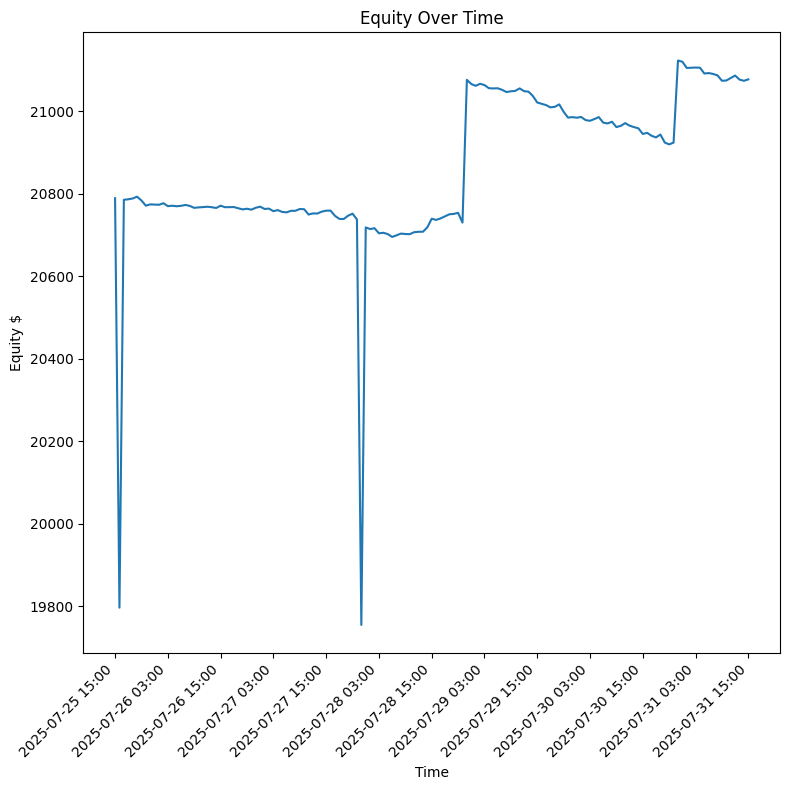

Hedged   APR 131.02%, Annualized Sharpe 1.69, Annualized Vol 77.41%
Unhedged APR -185.25%, Annualized Sharpe -1.67, Annualized Vol 110.67%
Max Drawdown: -5.00%


In [233]:
pnl_lp = lp_snaps['pnl']
pnl_hedge = snaps_df['pnl']
print(pnl_lp)
index = pnl_hedge.index.intersection(pnl_lp.index)
#edate = '2025-08-01 00:00:00+00:00'
#index = index[index<edate]
capital_lp = lp_snaps['equity'].loc[index].mean()
capital_hedge = snaps_df['total_equity'].loc[index].mean()
capital = capital_lp + capital_hedge
#equity_lp = capital + pnl_lp.cumsum().loc[index]
#equity_hedge = pnl_hedge.cumsum().loc[index]
equity_lp = capital_lp + pnl_lp.cumsum().loc[index]
equity_hedge = capital_hedge + pnl_hedge.cumsum().loc[index]
print(equity_hedge.diff())
combined_equity = equity_lp + equity_hedge
combined_equity.index = combined_equity.index.floor("%sT" % sample_freq_mins)
equity_lp.index = equity_lp.index.floor("%sT" % sample_freq_mins)
equity_hedge.index = equity_hedge.index.floor("%sT" % sample_freq_mins)


ce_log = np.log(combined_equity / combined_equity.shift(1))
dt_min = (combined_equity.index[1] - combined_equity.index[0]).total_seconds() / 60
deltat = 1 / (365 * 24 * 60 / dt_min)
mu = ce_log.mean()/deltat
apr = np.exp(mu) - 1
sig = ce_log.std() /np.sqrt(deltat)
lp_log = np.log(equity_lp/equity_lp.shift(1))
lp_mean = lp_log.mean() /deltat
lp_std = lp_log.std()/np.sqrt(deltat)
total_pnl = combined_equity.diff().sum()
pnl_per_day = total_pnl / (lookback_hours/24)
print(f"Hedge    PnL ${combined_equity.diff().sum():.2f}, Pnl per day ${pnl_per_day:.2f}, APR {100*apr:.2f}%, Annualized Sharpe {apr/sig:.2f}, Annualized Vol {sig* 100:.2f}%")
print(f"Unhedged PnL ${equity_lp.diff().sum():.2f}, APR {100 * lp_mean:.2f}%, Annualized Sharpe {lp_mean / lp_std:.2f}, Annualized Vol {100*lp_std:.2f}%")

equity_all = pd.DataFrame({"equity_lp": equity_lp, "equity_hedge": equity_hedge, "total_equity": combined_equity}, index=combined_equity.index)

import matplotlib.pyplot as plt
import numpy as np

y = equity_all['total_equity'].copy()
y = y.sort_index()
y.index = y.index.floor("%sT" % sample_freq_mins)
# y = y / y.iloc[0] * 1e5
# y = y.iloc[0] + (y.diff() * 52).cumsum() 

plt.figure(figsize=(8, 8))
plt.plot(y.index, y.values)

# Show every other timestamp
step = max(1, len(y.index) // 12 )
xticks = y.index[::step]

plt.xticks(ticks=xticks, labels=xticks.strftime('%Y-%m-%d %H:%M'), rotation=45, ha="right")
plt.title("Equity Over Time")
plt.ylabel("Equity $")
plt.xlabel("Time")
plt.tight_layout()
plt.show()

print(f"Hedged   APR {100*apr:.2f}%, Annualized Sharpe {apr/sig:.2f}, Annualized Vol {sig* 100:.2f}%")
print(f"Unhedged APR {100 * lp_mean:.2f}%, Annualized Sharpe {lp_mean / lp_std:.2f}, Annualized Vol {100*lp_std:.2f}%")
y.to_csv("../../Downloads/combined_eq.csv")

equity = y.copy()

# 1. Rolling peak
rolling_max = equity.cummax()

# 2. Drawdowns
drawdowns = (equity - rolling_max) / rolling_max

# 3. Max drawdown
max_drawdown = drawdowns.min()

print(f"Max Drawdown: {max_drawdown:.2%}")


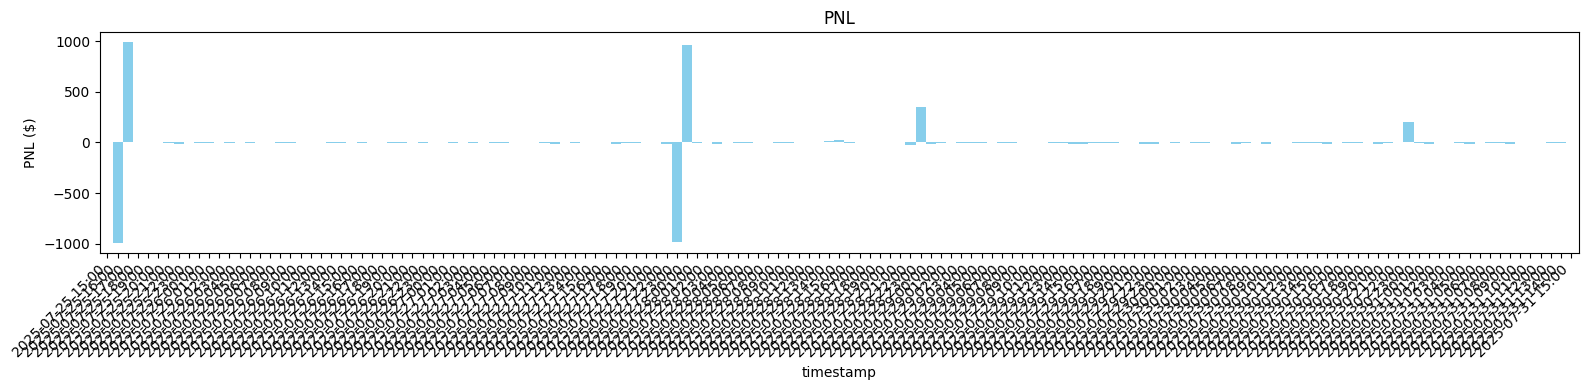

In [234]:

y = combined_equity.diff()
y.index = y.index.floor("%sT" % sample_freq_mins)
index = y.index
tick_spacing = 2
plt.figure(figsize=(16, 4))
ax = y.plot(kind="bar", width=1, color="skyblue")

# Find the indices where the timestamp is exactly on the hour
hourly_indices = [i for i, ts in enumerate(y.index) if ts.minute == 0]
ax.set_xticks(hourly_indices)
ax.set_xticklabels([y.index[i].strftime('%Y-%m-%d %H:%M') for i in hourly_indices],
                   rotation=45, ha='right')

plt.title("PNL")
plt.ylabel("PNL ($)")
plt.tight_layout()
plt.show()

pnl_model = y[y.shift(1) >= 0].sum()
pnl_base = y.sum()
#print(f"Pnl model ${pnl_model:.2f} vs base ${pnl_base:.2f}")
#pnl_model = y[y.shift(1) >= 0].cumsum().plot()
#pnl_model

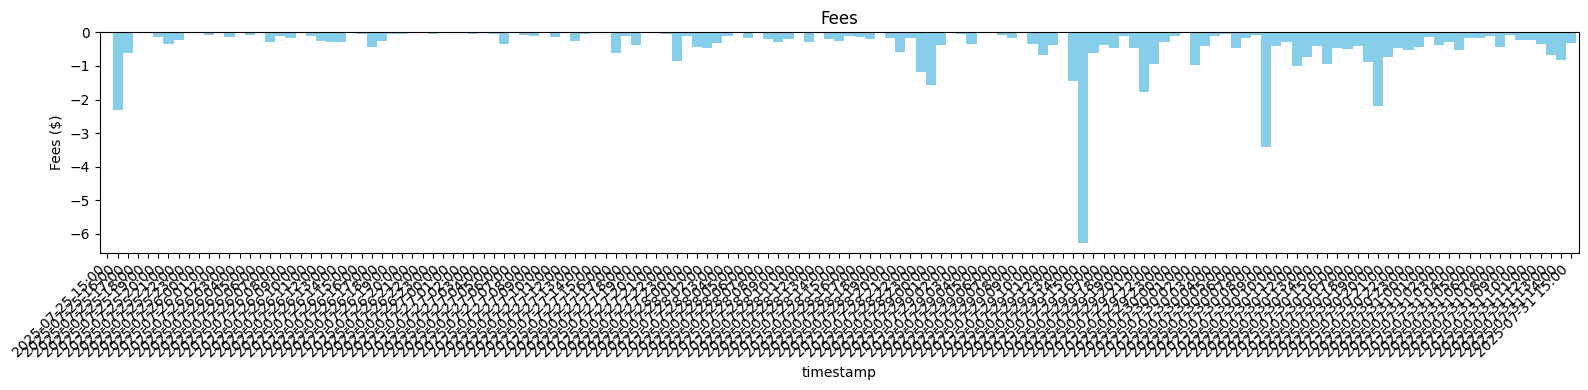

Total fees -53.01, Total funding 47.20
Net fees / day $-8.84; Fund per day $7.87; Net cost perday $-0.97
Fee APR -15.46% Funding APR 13.76%, Net APR -1.69%


In [235]:
capital = equity_all['total_equity'].mean()
y = -combined.set_index("timestamp")['fee'].dropna()
y = y.resample("%sT" % sample_freq_mins).sum().shift(1)
y = y.reindex(index).fillna(0)
tick_spacing = 1
plt.figure(figsize=(16, 4))
ax = y.plot(kind="bar", width=1, color="skyblue")

# Find the indices where the timestamp is exactly on the hour
hourly_indices = [i for i, ts in enumerate(y.index) if ts.minute == 0]
ax.set_xticks(hourly_indices)
ax.set_xticklabels([y.index[i].strftime('%Y-%m-%d %H:%M') for i in hourly_indices],
                   rotation=45, ha='right')

plt.title("Fees")
plt.ylabel("Fees ($)")
plt.tight_layout()
plt.show()
funding = combined.set_index('timestamp')[['incomeType', 'income']]
funding_df = funding[funding['incomeType'] == 'FUNDING'].fillna(0)['income']
funding = funding_df.sum()
print(f"Total fees {y.sum():.2f}, Total funding {funding:.2f}")
fees_per_day = (y.sum()) * 24 / lookback_hours
funding_per_day = funding  * 24 / lookback_hours
net_cost_per_day = fees_per_day + funding_per_day
fee_apr = 100*fees_per_day * 365 / capital
funding_apr = funding_per_day / capital * 365 * 100
net_apr = funding_apr + fee_apr
print(f"Net fees / day ${ fees_per_day:.2f}; Fund per day ${funding_per_day:.2f}; Net cost perday ${net_cost_per_day: .2f}")
print(f"Fee APR {fee_apr:.2f}% Funding APR {funding_apr:.2f}%, Net APR {net_apr:.2f}%")